In [ ]:
import tensorflow as tf
import pandas as pd
import plotly.graph_objects as go # Generate Graphs
from plotly.subplots import make_subplots #To Create Subplots

In [ ]:
missing_values = {
    'serumcholestrol':[0],
}
df = pd.read_csv('/content/Cardiovascular_Disease_Dataset.csv', na_values = missing_values)
print('There are Total {} datapoints in the dataset with {} Features listed as {}:'.format(df.shape[0], df.shape[1], df.columns.values))

There are Total 1000 datapoints in the dataset with 14 Features listed as ['patientid' 'age' 'gender' 'chestpain' 'restingBP' 'serumcholestrol'
 'fastingbloodsugar' 'restingrelectro' 'maxheartrate' 'exerciseangia'
 'oldpeak' 'slope' 'noofmajorvessels' 'target']:


In [ ]:
duplicates = df.loc[df.duplicated(keep=False)]
duplicates

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target


In [ ]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,NaN,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229.0,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142.0,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295.0,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,NaN,0,2,136,0,5.3,3,2,1


In [ ]:
features_with_null = [feature for feature in df.columns if df[feature].isnull().sum()>0]
if features_with_null:
    print('Features with Null Values {}'.format(features_with_null))
else:
    print('Dataset contains no Null Values')

Features with Null Values ['serumcholestrol']


In [ ]:
df=df.sample(frac=1)

In [ ]:
df=df.interpolate(method='linear', axis=0)

In [ ]:
duplicates.shape

(0, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 168 to 920
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   float64
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 117.2 KB


In [ ]:
df.drop(columns=['patientid'], inplace=True)

In [ ]:
duplicate_sum = df.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

Dataset contains no Duplicate Values


**Continuous Values**

Keeping a basic concept in my mind, if a column contains continuous values then it will have good quantity of Unique Values.
Taking 10 as that threshold :

df[feature].unique())>10

In [ ]:
columns = df.columns.values
for column in columns:
  print(f"{column} has {len(df[column].unique())} values. ")

age has 61 values. 
gender has 2 values. 
chestpain has 4 values. 
restingBP has 95 values. 
serumcholestrol has 374 values. 
fastingbloodsugar has 2 values. 
restingrelectro has 3 values. 
maxheartrate has 129 values. 
exerciseangia has 2 values. 
oldpeak has 63 values. 
slope has 4 values. 
noofmajorvessels has 4 values. 
target has 2 values. 


In [ ]:
Continuous_features = [feature for feature in df.columns if len(df[feature].unique())>10]
print('Continuous Values are : {}'.format(Continuous_features))

Continuous Values are : ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']


In [ ]:
df

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
168,57,1,2,190,445.0,0,1,181,0,2.2,2,1,1
631,26,1,2,185,194.0,0,2,147,0,2.0,1,2,1
261,44,1,1,182,327.5,0,1,146,0,1.3,2,1,1
602,76,0,1,186,461.0,1,2,138,0,1.8,1,3,0
608,57,1,0,133,136.0,0,0,118,0,4.7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,52,1,2,129,389.0,0,1,142,1,5.5,3,2,1
391,30,0,0,126,432.0,1,1,176,1,2.1,1,1,0
197,55,1,2,174,503.0,0,0,147,1,2.2,1,1,1
941,35,1,1,190,408.0,0,1,138,0,6.2,2,2,1


In [ ]:
df[Continuous_features].head()

,age,restingBP,serumcholestrol,maxheartrate,oldpeak
0,53,171,0,147,5.3
1,40,94,229,115,3.7
2,49,133,142,202,5.0
3,43,138,295,153,3.2
4,31,199,0,136,5.3


**Distribution of the Numerical Values**



In [ ]:
df[Continuous_features].describe()

,age,restingBP,serumcholestrol,maxheartrate,oldpeak
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.24200,151.747000,311.447000,145.477000,2.707700
std,17.86473,29.965228,132.443801,34.190268,1.720753
min,20.00000,94.000000,0.000000,71.000000,0.000000
25%,34.00000,129.000000,235.750000,119.750000,1.300000
50%,49.00000,147.000000,318.000000,146.000000,2.400000
75%,64.25000,181.000000,404.250000,175.000000,4.100000
max,80.00000,200.000000,602.000000,202.000000,6.200000


In [ ]:
fig = go.Figure()

fig.add_trace(go.Box(x=df['restingBP'], name = 'restingBP', boxpoints='outliers',))
fig.add_trace(go.Box(x=df['maxheartrate'], name = 'maxheartrate', boxpoints='outliers',))

fig.update_layout(title_text="Box Plot for maxheartrate and restingBP with Outliers")
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("restingBP Distribution", "maxheartrate Distribution"))

trace0 = go.Histogram(x=df['restingBP'], name = 'restingBP')
trace1 = go.Histogram(x=df['maxheartrate'], name = 'maxheartrate')


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig.update_xaxes(title_text="restingBP", row=1, col=1)
fig.update_yaxes(title_text="Total Count", row=1, col=1)

fig.update_xaxes(title_text="maxhearatrate", row=1, col=2)
fig.update_yaxes(title_text="Total Count", row=1, col=2)

fig.update_layout(title_text="Histograph", height=700)


fig.show()

In [ ]:
import numpy as np

In [ ]:
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
outliers(df[['restingBP', 'maxheartrate']])

For the feature restingBP, No of Outliers is 0
For the feature maxheartrate, No of Outliers is 0


In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df['age'], name = 'Age'))
fig.show()

In [ ]:
fig = go.Figure(data=[go.Bar(x = df[df['target'] == 0]['age'].value_counts().index.to_list(),
                             y =df[df['target'] == 0]['age'].value_counts().values, name = 'Non CVD'),
                      go.Bar(x = df[df['target'] == 1]['age'].value_counts().index.to_list(),
                             y =df[df['target'] == 1]['age'].value_counts().values, name = 'CVD')]
               )

fig.update_layout(barmode='group', xaxis_tickangle=-45, title_text="Distribution of Age groups grouped by Target Value",
                  yaxis=dict(
        title='Total Count',
        titlefont_size=16,
        tickfont_size=14,
    ),     xaxis=dict(
        title='Age',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

In [ ]:
fig = go.Figure([go.Pie(labels=df[df['target'] == 0]['age'].value_counts().index.to_list(),values=df[df['target'] == 0]['age'].value_counts().values)])
fig.update_layout(title_text="Distribution of Age group for Non CVD", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(textposition='inside')
fig.show()

In [ ]:
fig = go.Figure([go.Pie(labels=df[df['target'] == 1]['age'].value_counts().index.to_list(),values=df[df['target'] == 1]['age'].value_counts().values)])
fig.update_layout(title_text="Distribution of Age group for CVD", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(textposition='inside')
fig.show()

**PCA**

we can convert out 12D dataset (because of 12 features) in 2D in order to visualize it.

In [ ]:
target_value = df['target']
df_for_pca = df.drop(['target'], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn import decomposition #pca

In [ ]:
import numpy as np

In [ ]:
scaled_data = StandardScaler().fit_transform(df_for_pca)

pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(scaled_data)

pca_data = np.vstack((pca_data.T, target_value)).T
pca_df = pd.DataFrame(data = pca_data, columns = ('first', 'second', 'label'))

In [ ]:
fig = go.Figure(data=go.Scattergl(
    x = pca_df['first'],
    y = pca_df['second'],
    mode='markers',
    marker_color=pca_df['label']
))

fig.show()

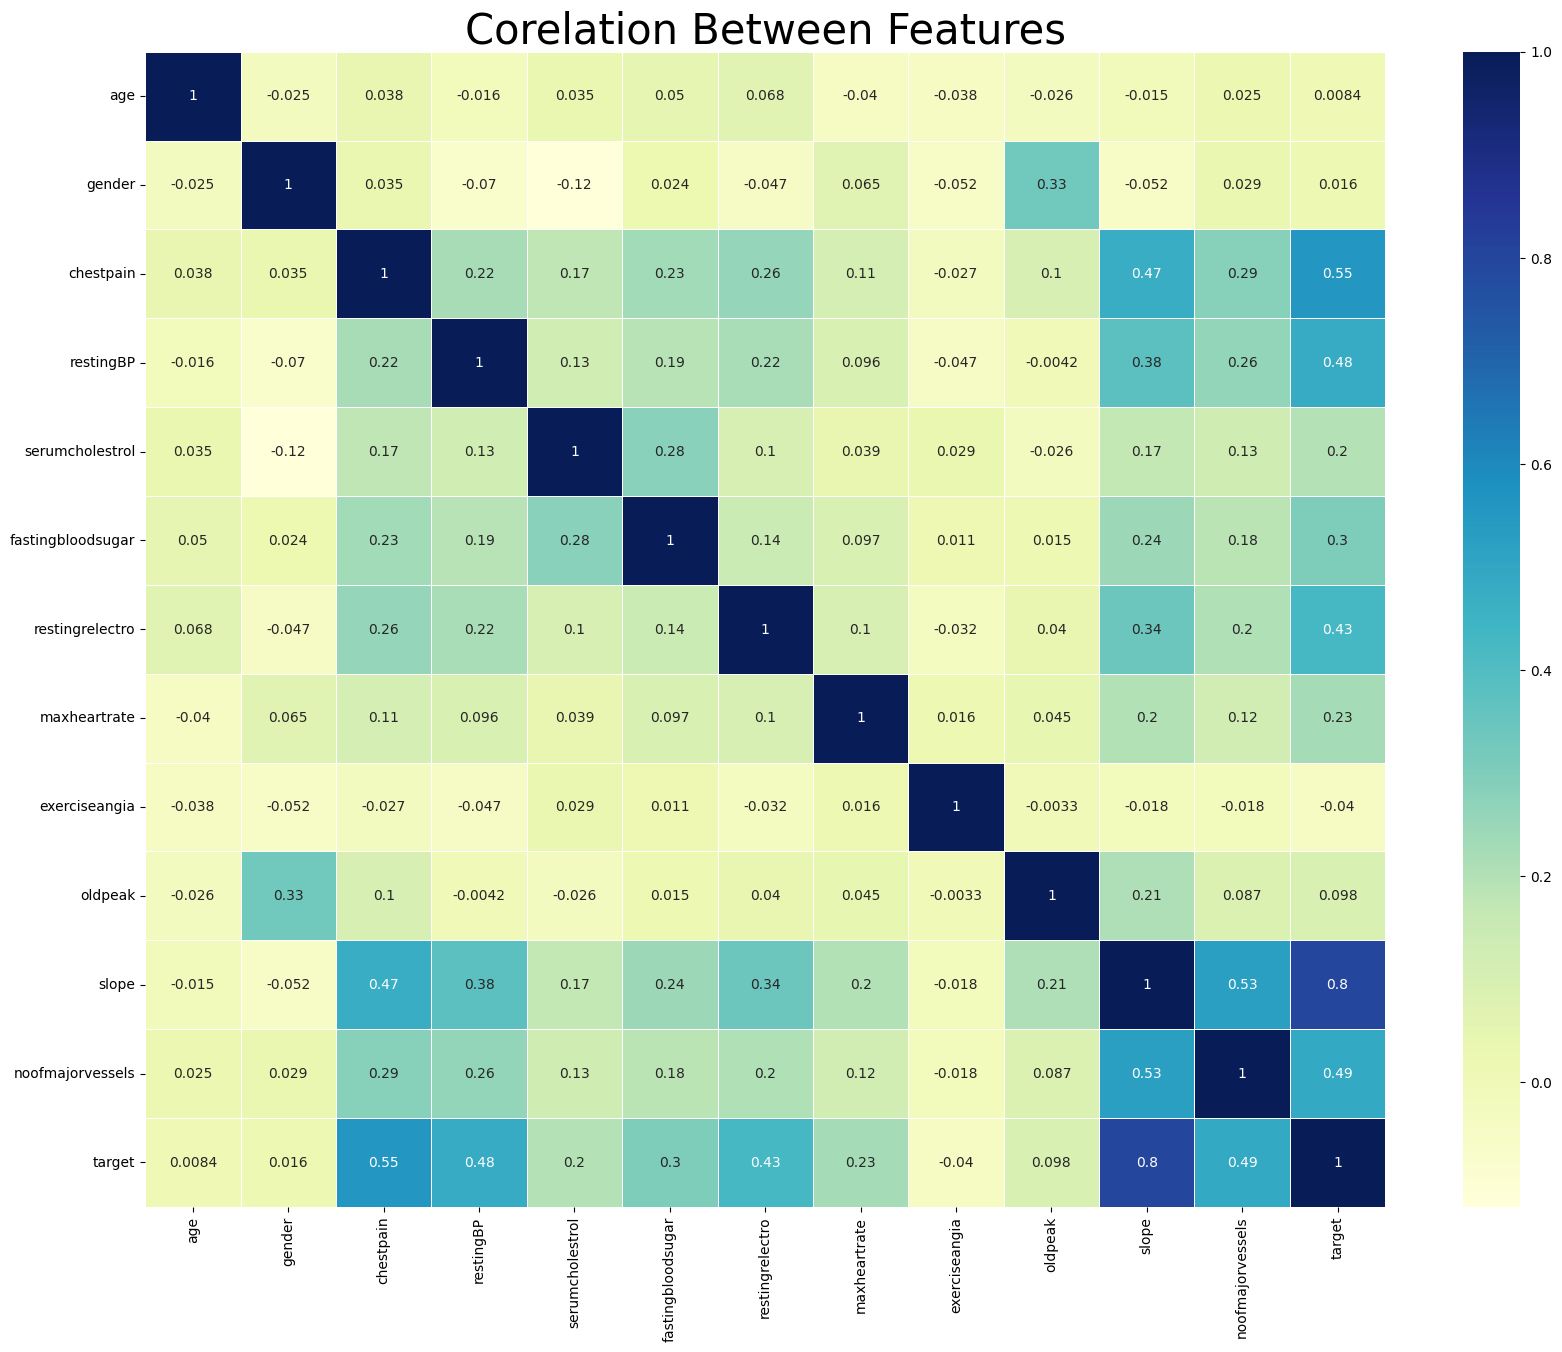

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features', fontsize = 30)
plt.show()

In [ ]:
#Because we can see above that age has less correlation with target we can drop age column
df = df.drop('age', axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
columns = df.columns.values
print(columns)

['gender' 'chestpain' 'restingBP' 'serumcholestrol' 'fastingbloodsugar'
 'restingrelectro' 'maxheartrate' 'exerciseangia' 'oldpeak' 'slope'
 'noofmajorvessels' 'target']


In [ ]:
df['target'].value_counts()

1    580
0    420
Name: target, dtype: int64

In [ ]:
for column in columns:
  feature_array=df[column].values.reshape(-1, 1)
  df[column]=scaler.fit_transform(feature_array)

In [ ]:
df.head()

,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
168,1.0,0.666667,0.905660,0.696325,0.0,0.5,0.839695,0.0,0.354839,0.666667,0.333333,1.0
631,1.0,0.666667,0.858491,0.210832,0.0,1.0,0.580153,0.0,0.322581,0.333333,0.666667,1.0
261,1.0,0.333333,0.830189,0.469052,0.0,0.5,0.572519,0.0,0.209677,0.666667,0.333333,1.0
602,0.0,0.333333,0.867925,0.727273,1.0,1.0,0.511450,0.0,0.290323,0.333333,1.000000,0.0
608,1.0,0.000000,0.367925,0.098646,0.0,0.0,0.358779,0.0,0.758065,0.333333,0.333333,0.0


In [ ]:
import numpy as np

In [ ]:
X = np.array(df.iloc[:, :-1])
y = np.array(df.iloc[:, -1:])

In [ ]:
print(X.shape)
print(y.shape)

(1000, 11)
(1000, 1)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [ ]:
print(train_X.shape)

(800, 11)


In [ ]:
zco=0
for val in train_y:
  if(val==0):
    zco = zco + 1
zco1=0
print(zco)
print(len(train_y)-zco)

336
464


In [ ]:
zco=0
for val in test_y:
  if(val==0):
    zco = zco + 1
zco1=0
print(zco)
print(len(test_y)-zco)

84
116


**Implementing CrossValidation**

In [ ]:
from sklearn.metrics import  classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

************** FOR fold No. 0 ****************
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        82
         1.0       0.97      1.00      0.98       118

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

Accuracy score of xgb   0.98
************** FOR fold No. 1 ****************
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96        86
         1.0       0.95      0.99      0.97       114

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200

Accuracy score of xgb   0.965
************** FOR fold No. 2 ****************
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98        73
         1.0       0.98      0.99    

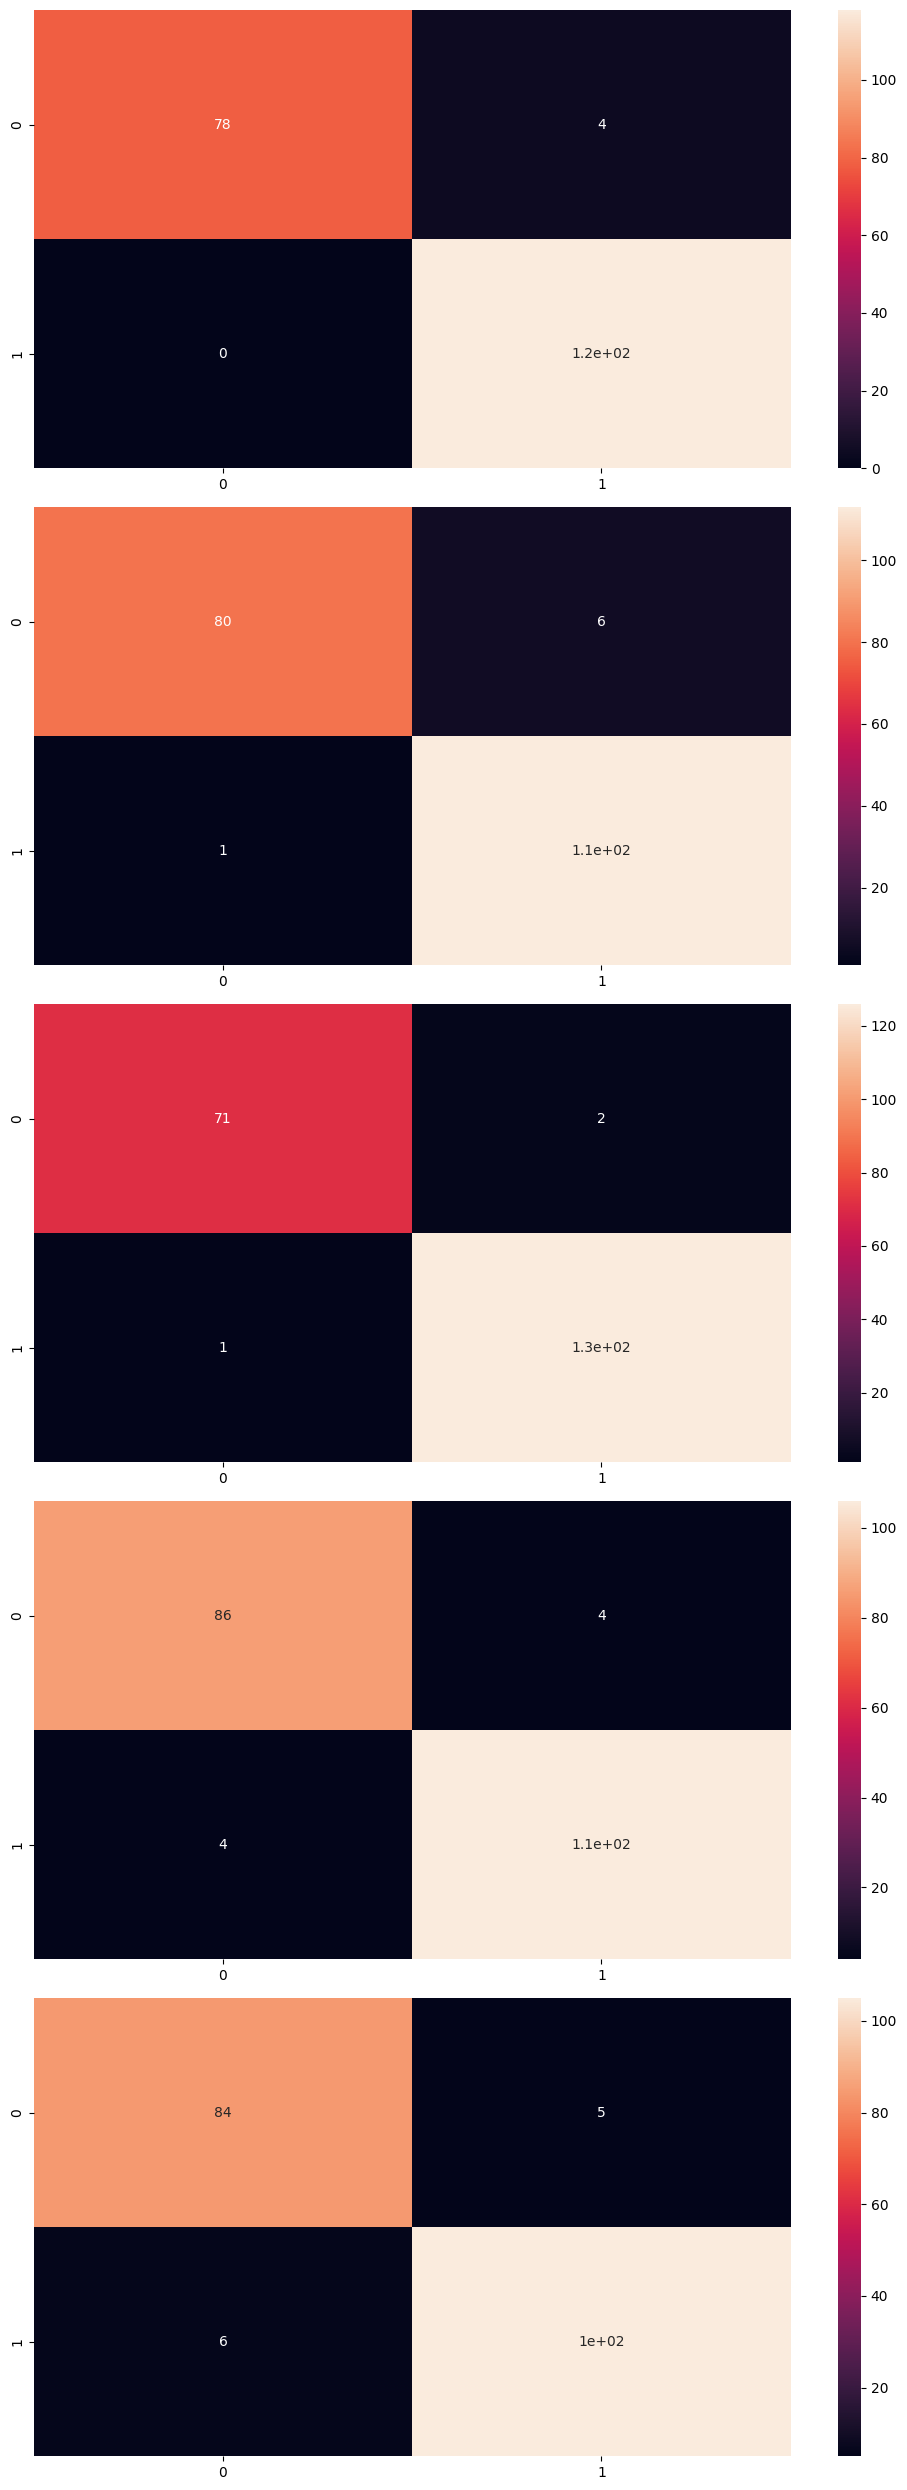

In [ ]:
import matplotlib.pyplot as plt
fold = 5
train_X = []
test_X = []
train_y = []
test_y = []
seg_len = int(len(X) / fold)

# Create a figure and set the size according to the number of folds
fig, axs = plt.subplots(fold, figsize=(10, 5 * fold))

for fold_num in range(fold):
    st_test = fold_num * seg_len
    en_test = st_test + seg_len
    test_X = X[st_test:en_test]
    train_X = np.concatenate((X[:st_test], X[en_test:]), axis=0)
    test_y = y[st_test:en_test]
    train_y = np.concatenate((y[:st_test], y[en_test:]), axis=0)

    # Use a specific axis for each fold's heatmap
    ax = axs[fold_num]

    print(f"************** FOR fold No. {fold_num} ****************")
    xgb.fit(train_X, train_y)
    y_pred = xgb.predict(test_X)
    print(classification_report(test_y, y_pred))
    print("Accuracy score of xgb", " ", accuracy_score(test_y, y_pred))
    conf = confusion_matrix(test_y, y_pred)
    sns.heatmap(conf, cbar=True, annot=True, ax=ax)  # Use ax parameter to specify the subplot

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(criterion="entropy",random_state=42)

************** FOR fold No. 0 ****************
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96        82
         1.0       0.96      0.98      0.97       118

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200

Accuracy score of dec   0.965
************** FOR fold No. 1 ****************
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96        86
         1.0       0.97      0.97      0.97       114

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

Accuracy score of dec   0.965
************** FOR fold No. 2 ****************
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95        73
         1.0       0.98      0.95   

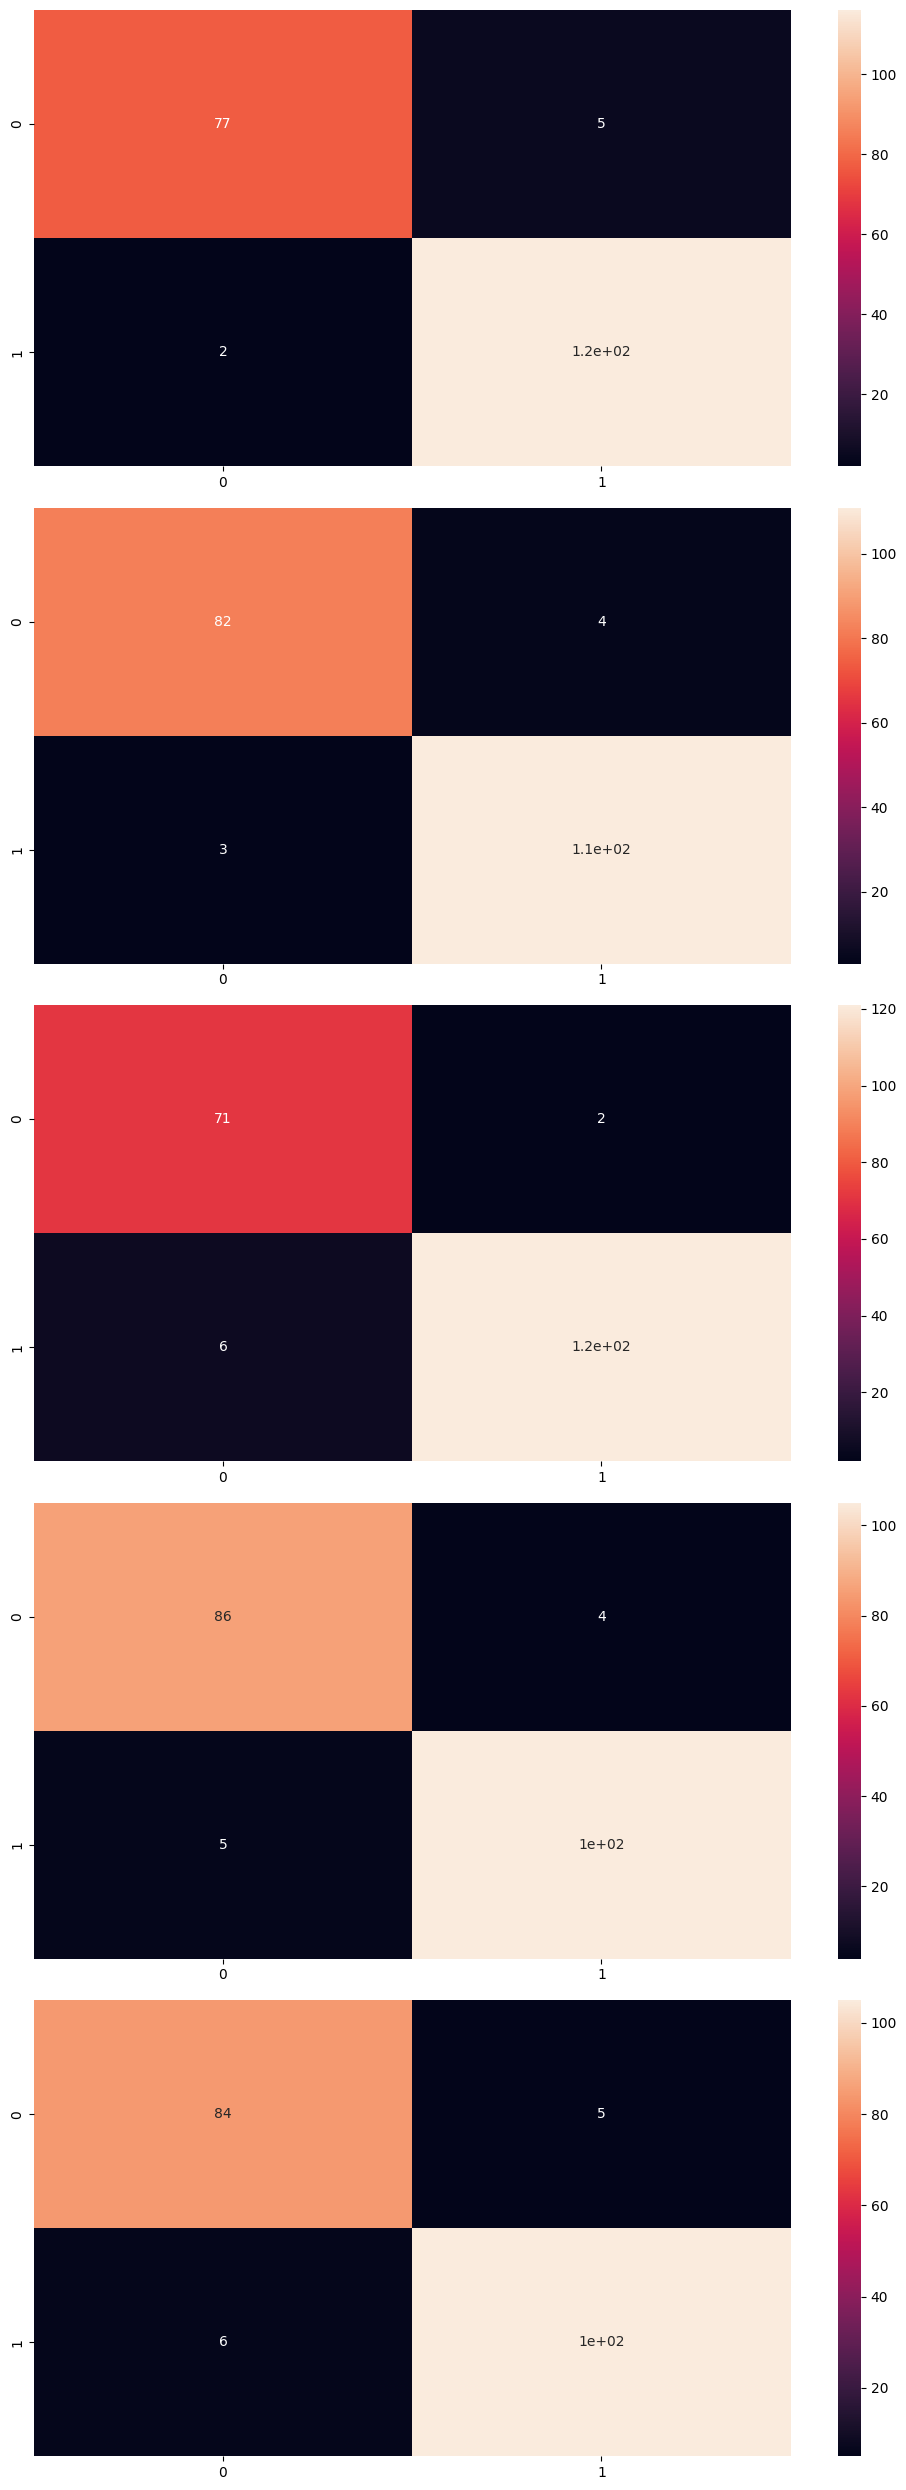

In [ ]:
import matplotlib.pyplot as plt
fold = 5
train_X = []
test_X = []
train_y = []
test_y = []
seg_len = int(len(X) / fold)

# Create a figure and set the size according to the number of folds
fig, axs = plt.subplots(fold, figsize=(10, 5 * fold))

for fold_num in range(fold):
    st_test = fold_num * seg_len
    en_test = st_test + seg_len
    test_X = X[st_test:en_test]
    train_X = np.concatenate((X[:st_test], X[en_test:]), axis=0)
    test_y = y[st_test:en_test]
    train_y = np.concatenate((y[:st_test], y[en_test:]), axis=0)

    # Use a specific axis for each fold's heatmap
    ax = axs[fold_num]

    print(f"************** FOR fold No. {fold_num} ****************")
    dec.fit(train_X, train_y)
    y_pred = dec.predict(test_X)
    print(classification_report(test_y, y_pred))
    print("Accuracy score of dec", " ", accuracy_score(test_y, y_pred))
    conf = confusion_matrix(test_y, y_pred)
    sns.heatmap(conf, cbar=True, annot=True, ax=ax)  # Use ax parameter to specify the subplot

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 30,random_state=42)

************** FOR fold No. 0 ****************
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97        82
         1.0       0.97      0.99      0.98       118

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200

Accuracy score of rfc   0.975


<ipython-input-106-f061a870e83e>:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



************** FOR fold No. 1 ****************
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97        86
         1.0       0.97      0.99      0.98       114

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200

Accuracy score of rfc   0.975


<ipython-input-106-f061a870e83e>:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



************** FOR fold No. 2 ****************
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        73
         1.0       0.99      0.99      0.99       127

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

Accuracy score of rfc   0.99


<ipython-input-106-f061a870e83e>:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



************** FOR fold No. 3 ****************
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95        90
         1.0       0.95      0.97      0.96       110

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200

Accuracy score of rfc   0.955


<ipython-input-106-f061a870e83e>:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



************** FOR fold No. 4 ****************
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94        89
         1.0       0.95      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200

Accuracy score of rfc   0.945


<ipython-input-106-f061a870e83e>:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



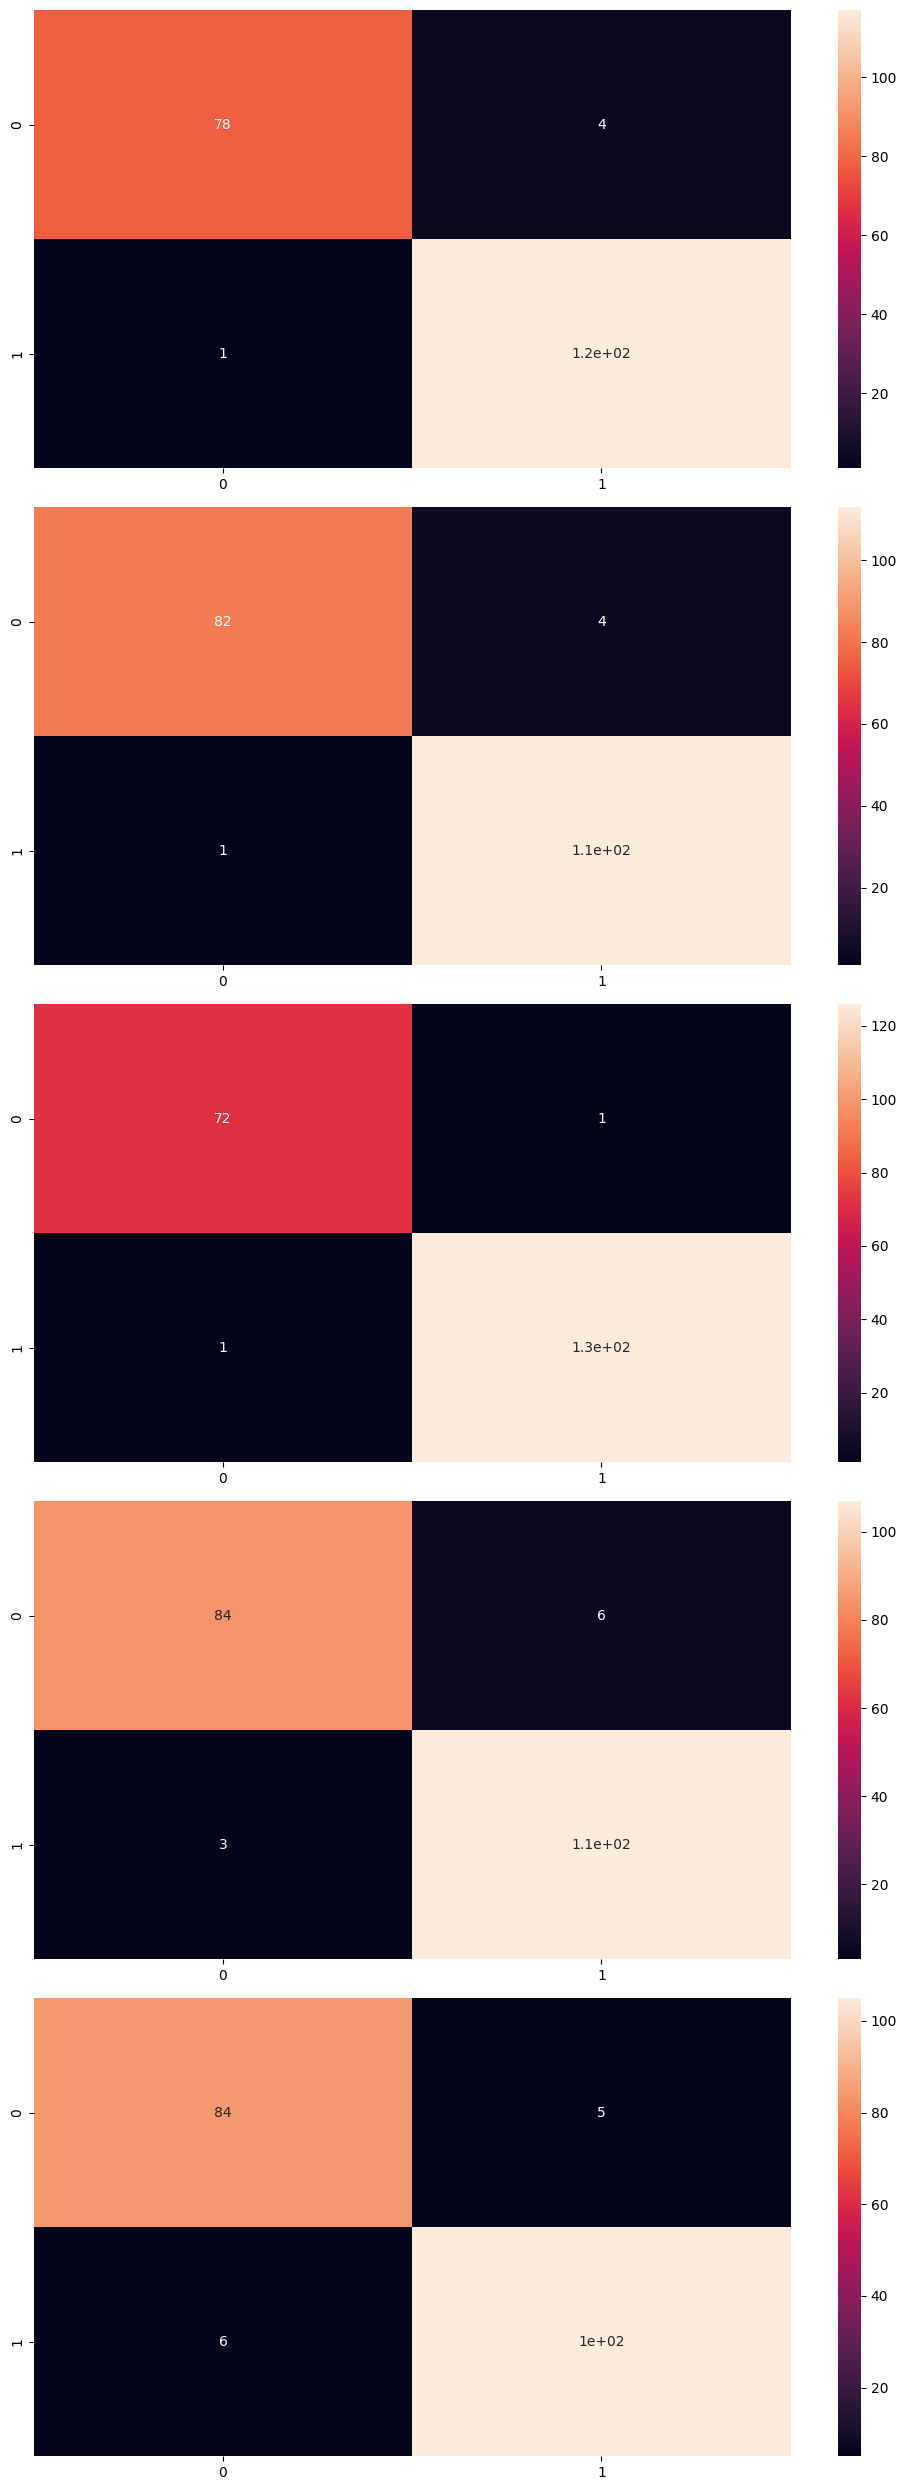

In [ ]:
import matplotlib.pyplot as plt
fold = 5
train_X = []
test_X = []
train_y = []
test_y = []
seg_len = int(len(X) / fold)

# Create a figure and set the size according to the number of folds
fig, axs = plt.subplots(fold, figsize=(10, 5 * fold))

for fold_num in range(fold):
    st_test = fold_num * seg_len
    en_test = st_test + seg_len
    test_X = X[st_test:en_test]
    train_X = np.concatenate((X[:st_test], X[en_test:]), axis=0)
    test_y = y[st_test:en_test]
    train_y = np.concatenate((y[:st_test], y[en_test:]), axis=0)

    # Use a specific axis for each fold's heatmap
    ax = axs[fold_num]

    print(f"************** FOR fold No. {fold_num} ****************")
    rfc.fit(train_X, train_y)
    y_pred = rfc.predict(test_X)
    print(classification_report(test_y, y_pred))
    print("Accuracy score of rfc", " ", accuracy_score(test_y, y_pred))
    conf = confusion_matrix(test_y, y_pred)
    sns.heatmap(conf, cbar=True, annot=True, ax=ax)  # Use ax parameter to specify the subplot

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(11,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                384       
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4609 (18.00 KB)
Trainable params: 4609 (18.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

************** FOR fold No. 0 ****************
7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.82      0.89        82
         1.0       0.89      0.99      0.94       118

    accuracy                           0.92       200
   macro avg       0.94      0.90      0.91       200
weighted avg       0.93      0.92      0.92       200

Accuracy score of NN Model is:  0.92
************** FOR fold No. 1 ****************
7/7 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92        86
         1.0       0.92      0.97      0.94       114

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200

Accuracy score of NN Model is:  0.935
************** FOR fold No. 2 ****************
7/7 [=======================

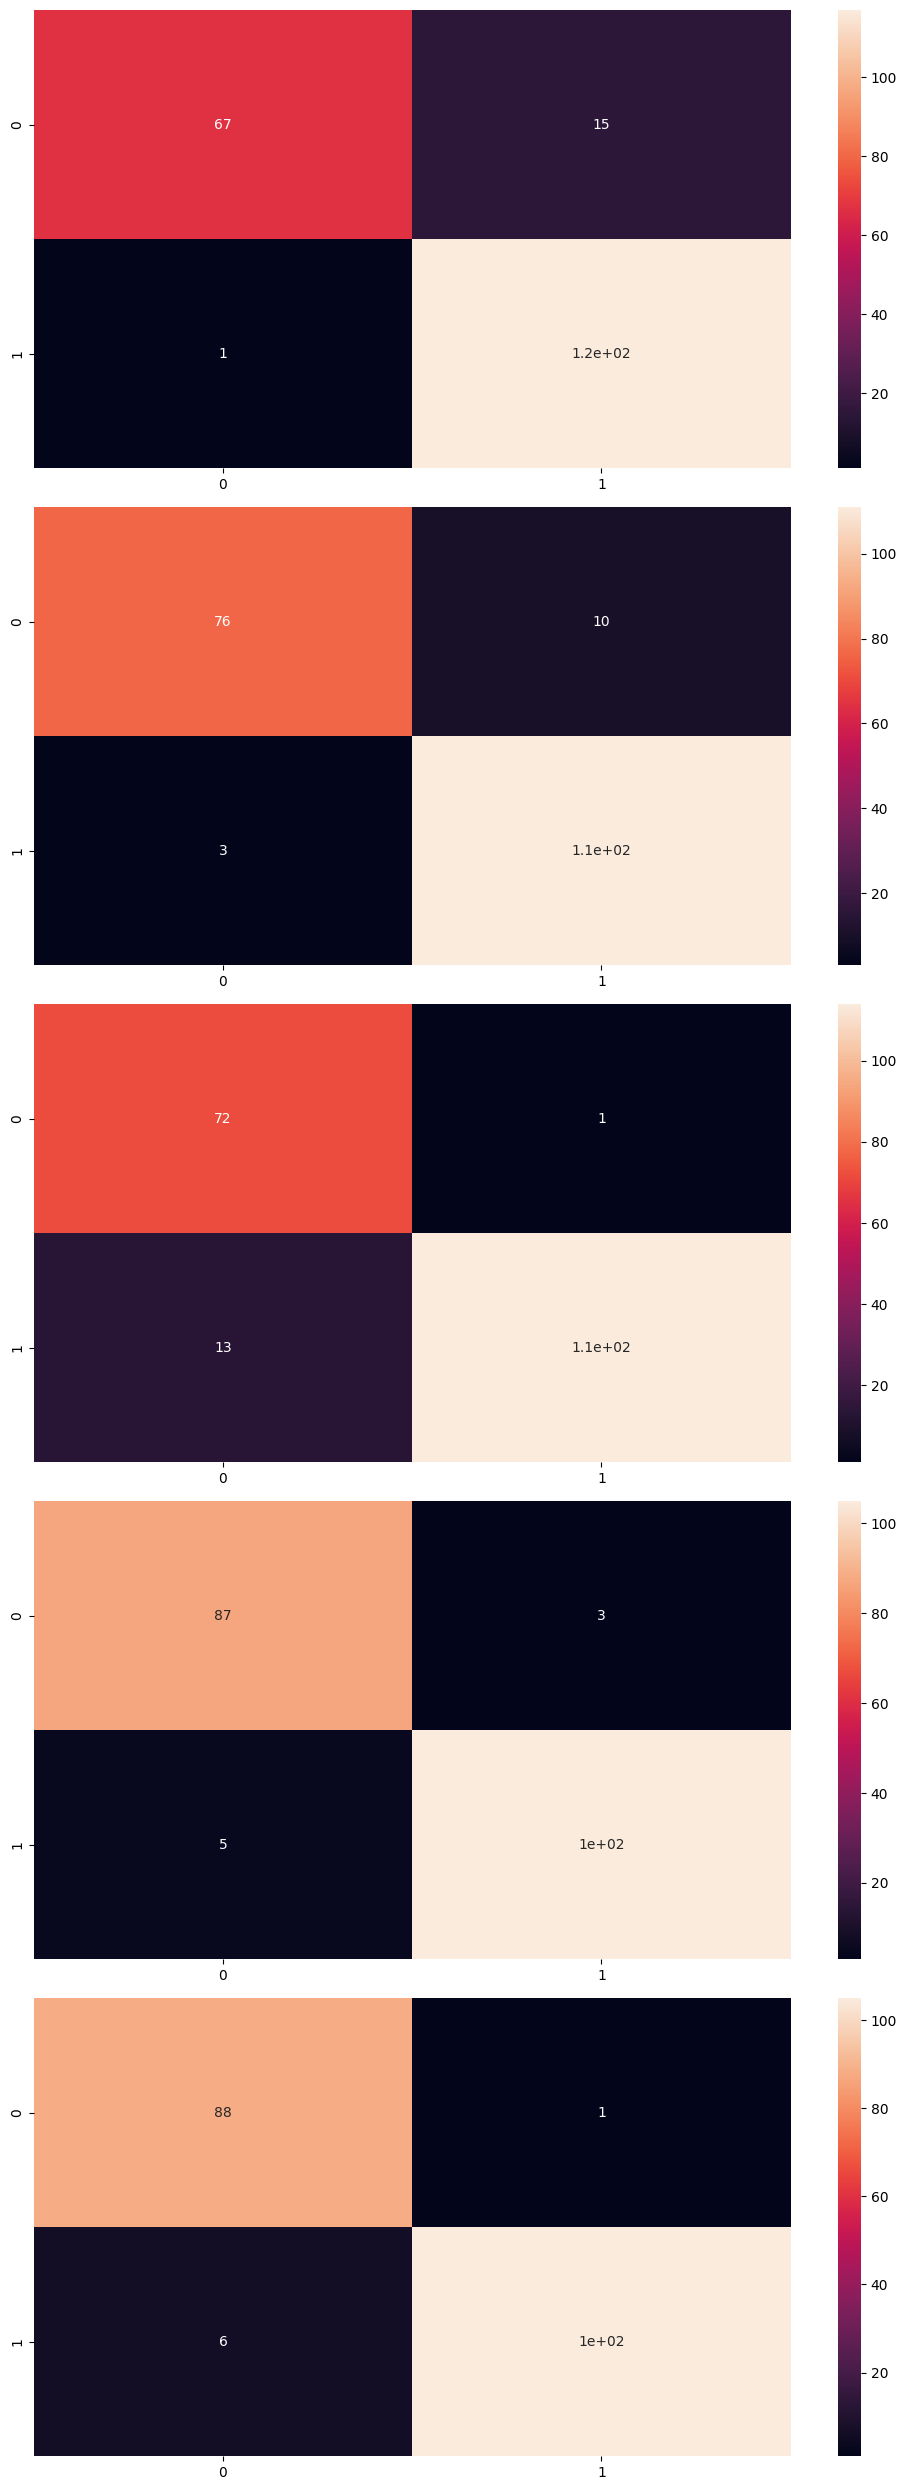

In [ ]:
import matplotlib.pyplot as plt
fold = 5
train_X = []
test_X = []
train_y = []
test_y = []
seg_len = int(len(X) / fold)

# Create a figure and set the size according to the number of folds
fig, axs = plt.subplots(fold, figsize=(10, 5 * fold))

for fold_num in range(fold):
    st_test = fold_num * seg_len
    en_test = st_test + seg_len
    test_X = X[st_test:en_test]
    train_X = np.concatenate((X[:st_test], X[en_test:]), axis=0)
    test_y = y[st_test:en_test]
    train_y = np.concatenate((y[:st_test], y[en_test:]), axis=0)

    # Use a specific axis for each fold's heatmap
    ax = axs[fold_num]

    print(f"************** FOR fold No. {fold_num} ****************")
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)

    for i in range(len(y_pred)):
      if(y_pred[i]>0.5):
        y_pred[i]=[1]
      else:
        y_pred[i]=[0]

    y_pred = np.squeeze(y_pred)
    print(classification_report(test_y, y_pred))
    print("Accuracy score of NN Model is: ", accuracy_score(test_y, y_pred))
    conf = confusion_matrix(test_y, y_pred)
    sns.heatmap(conf, cbar=True, annot=True, ax=ax)  # Use ax parameter to specify the subplot

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 3.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier()

************** FOR fold No. 0 ****************
Learning rate set to 0.009366
0:	learn: 0.6802790	total: 5.47ms	remaining: 5.47s
1:	learn: 0.6656149	total: 11.4ms	remaining: 5.68s
2:	learn: 0.6510010	total: 15.9ms	remaining: 5.3s
3:	learn: 0.6359828	total: 20.2ms	remaining: 5.03s
4:	learn: 0.6242106	total: 22.1ms	remaining: 4.4s
5:	learn: 0.6130976	total: 23.5ms	remaining: 3.9s
6:	learn: 0.5987836	total: 25.1ms	remaining: 3.56s
7:	learn: 0.5867378	total: 27.1ms	remaining: 3.35s
8:	learn: 0.5732397	total: 29.4ms	remaining: 3.24s
9:	learn: 0.5609481	total: 31.1ms	remaining: 3.08s
10:	learn: 0.5494336	total: 32.7ms	remaining: 2.94s
11:	learn: 0.5374717	total: 34.1ms	remaining: 2.81s
12:	learn: 0.5273429	total: 36ms	remaining: 2.73s
13:	learn: 0.5157990	total: 37.5ms	remaining: 2.64s
14:	learn: 0.5051657	total: 39.2ms	remaining: 2.57s
15:	learn: 0.4947988	total: 40.7ms	remaining: 2.5s
16:	learn: 0.4854584	total: 42.3ms	remaining: 2.45s
17:	learn: 0.4770473	total: 43.8ms	remaining: 2.39s
18:

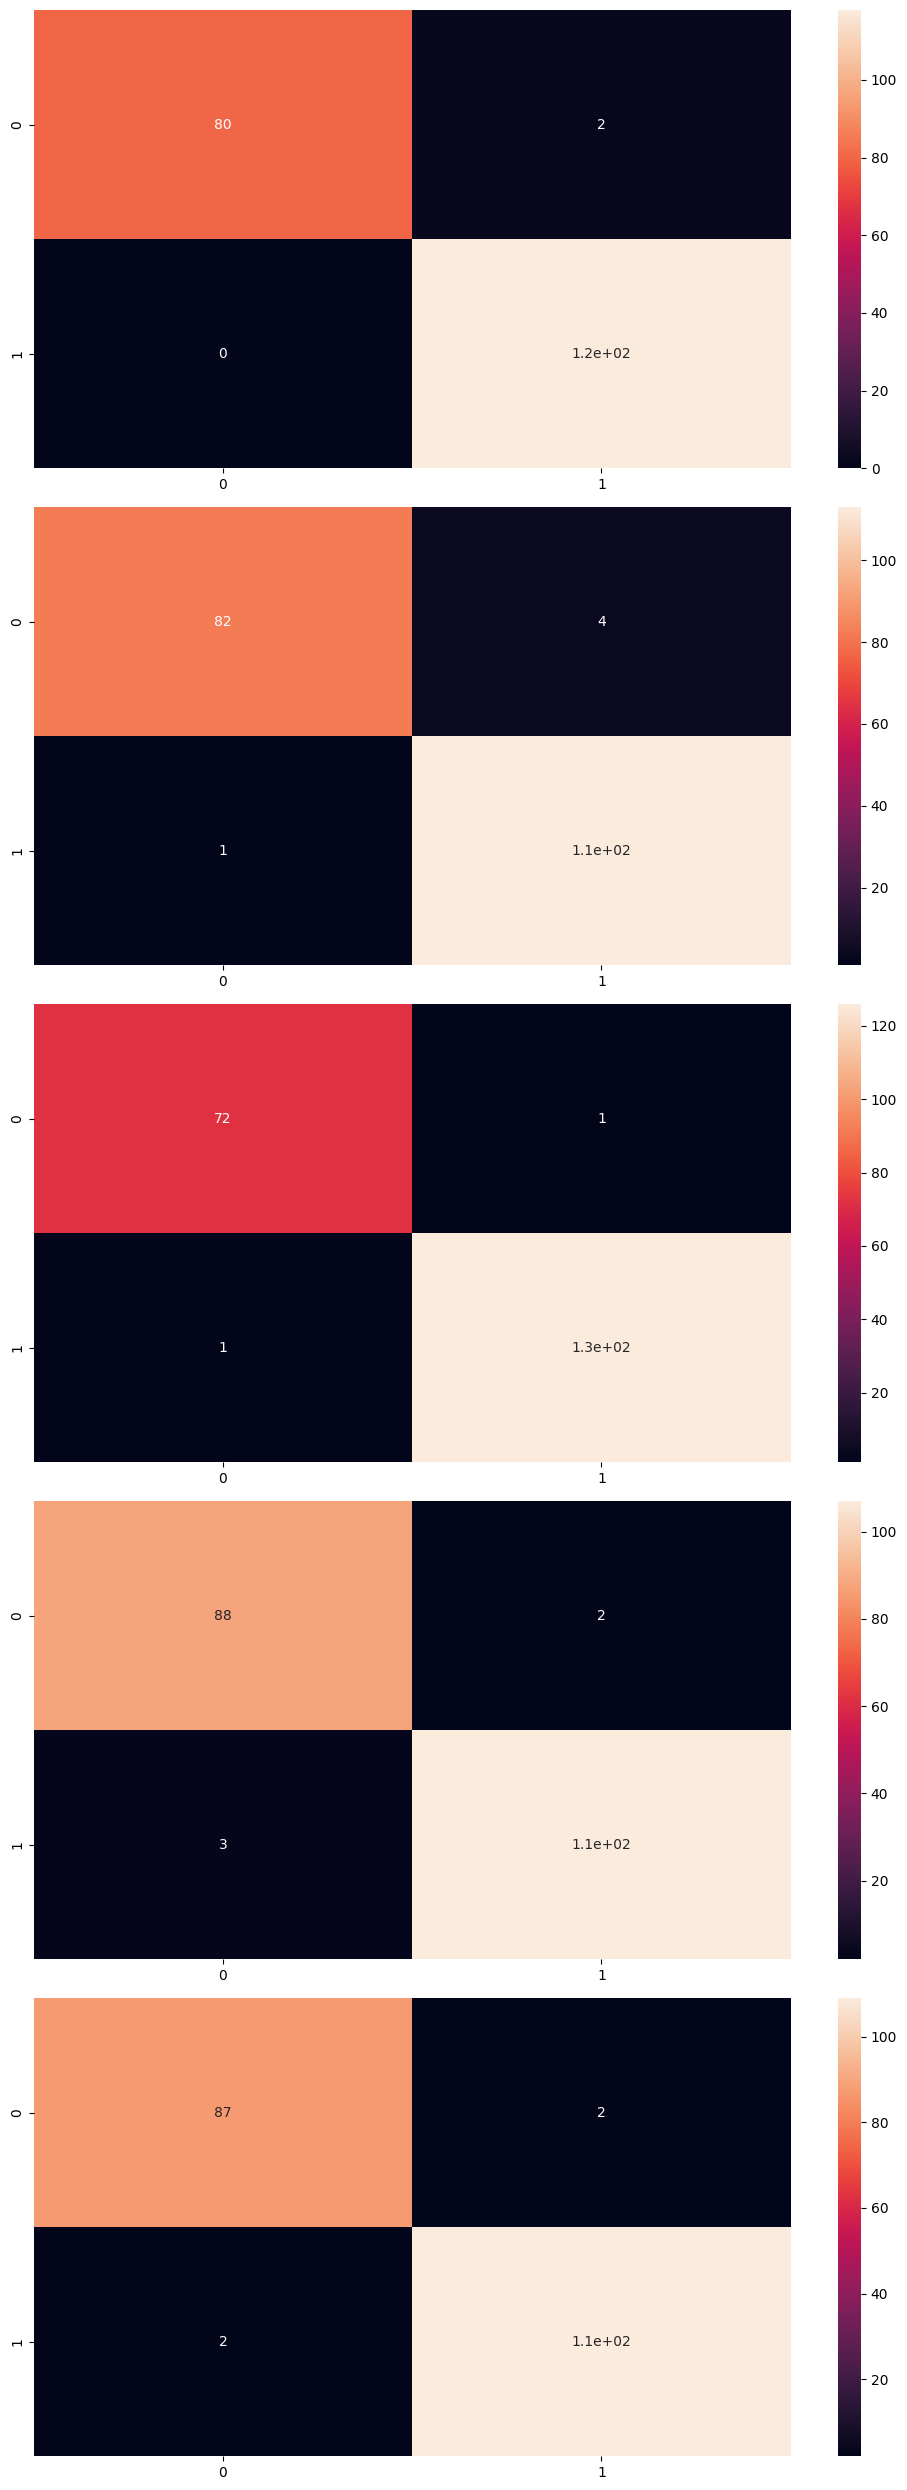

In [ ]:
import matplotlib.pyplot as plt
fold = 5
train_X = []
test_X = []
train_y = []
test_y = []
seg_len = int(len(X) / fold)

# Create a figure and set the size according to the number of folds
fig, axs = plt.subplots(fold, figsize=(10, 5 * fold))

for fold_num in range(fold):
    st_test = fold_num * seg_len
    en_test = st_test + seg_len
    test_X = X[st_test:en_test]
    train_X = np.concatenate((X[:st_test], X[en_test:]), axis=0)
    test_y = y[st_test:en_test]
    train_y = np.concatenate((y[:st_test], y[en_test:]), axis=0)

    # Use a specific axis for each fold's heatmap
    ax = axs[fold_num]

    print(f"************** FOR fold No. {fold_num} ****************")
    clf.fit(train_X, train_y)
    y_pred = clf.predict(test_X)
    print(classification_report(test_y, y_pred))
    print("Accuracy score of clf", " ", accuracy_score(test_y, y_pred))
    conf = confusion_matrix(test_y, y_pred)
    sns.heatmap(conf, cbar=True, annot=True, ax=ax)  # Use ax parameter to specify the subplot

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

************** FOR fold No. 0 ****************
[LightGBM] [Info] Number of positive: 462, number of negative: 338
[LightGBM] [Info] Total Bins 531
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.577500 -> initscore=0.312519
[LightGBM] [Info] Start training from score 0.312519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 1 ****************
[LightGBM] [Info] Number of positive: 466, number of negative: 334
[LightGBM] [Info] Total Bins 531
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.582500 -> initscore=0.333045
[LightGBM] [Info] Start training from score 0.333045
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 2 ****************
[LightGBM] [Info] Number of positive: 453, number of negative: 347
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.566250 -> initscore=0.266567
[LightGBM] [Info] Start training from score 0.266567
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 3 ****************
[LightGBM] [Info] Number of positive: 470, number of negative: 330
[LightGBM] [Info] Total Bins 536
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.587500 -> initscore=0.353640
[LightGBM] [Info] Start training from score 0.353640
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 4 ****************
[LightGBM] [Info] Number of positive: 469, number of negative: 331
[LightGBM] [Info] Total Bins 534
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.586250 -> initscore=0.348484
[LightGBM] [Info] Start training from score 0.348484
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



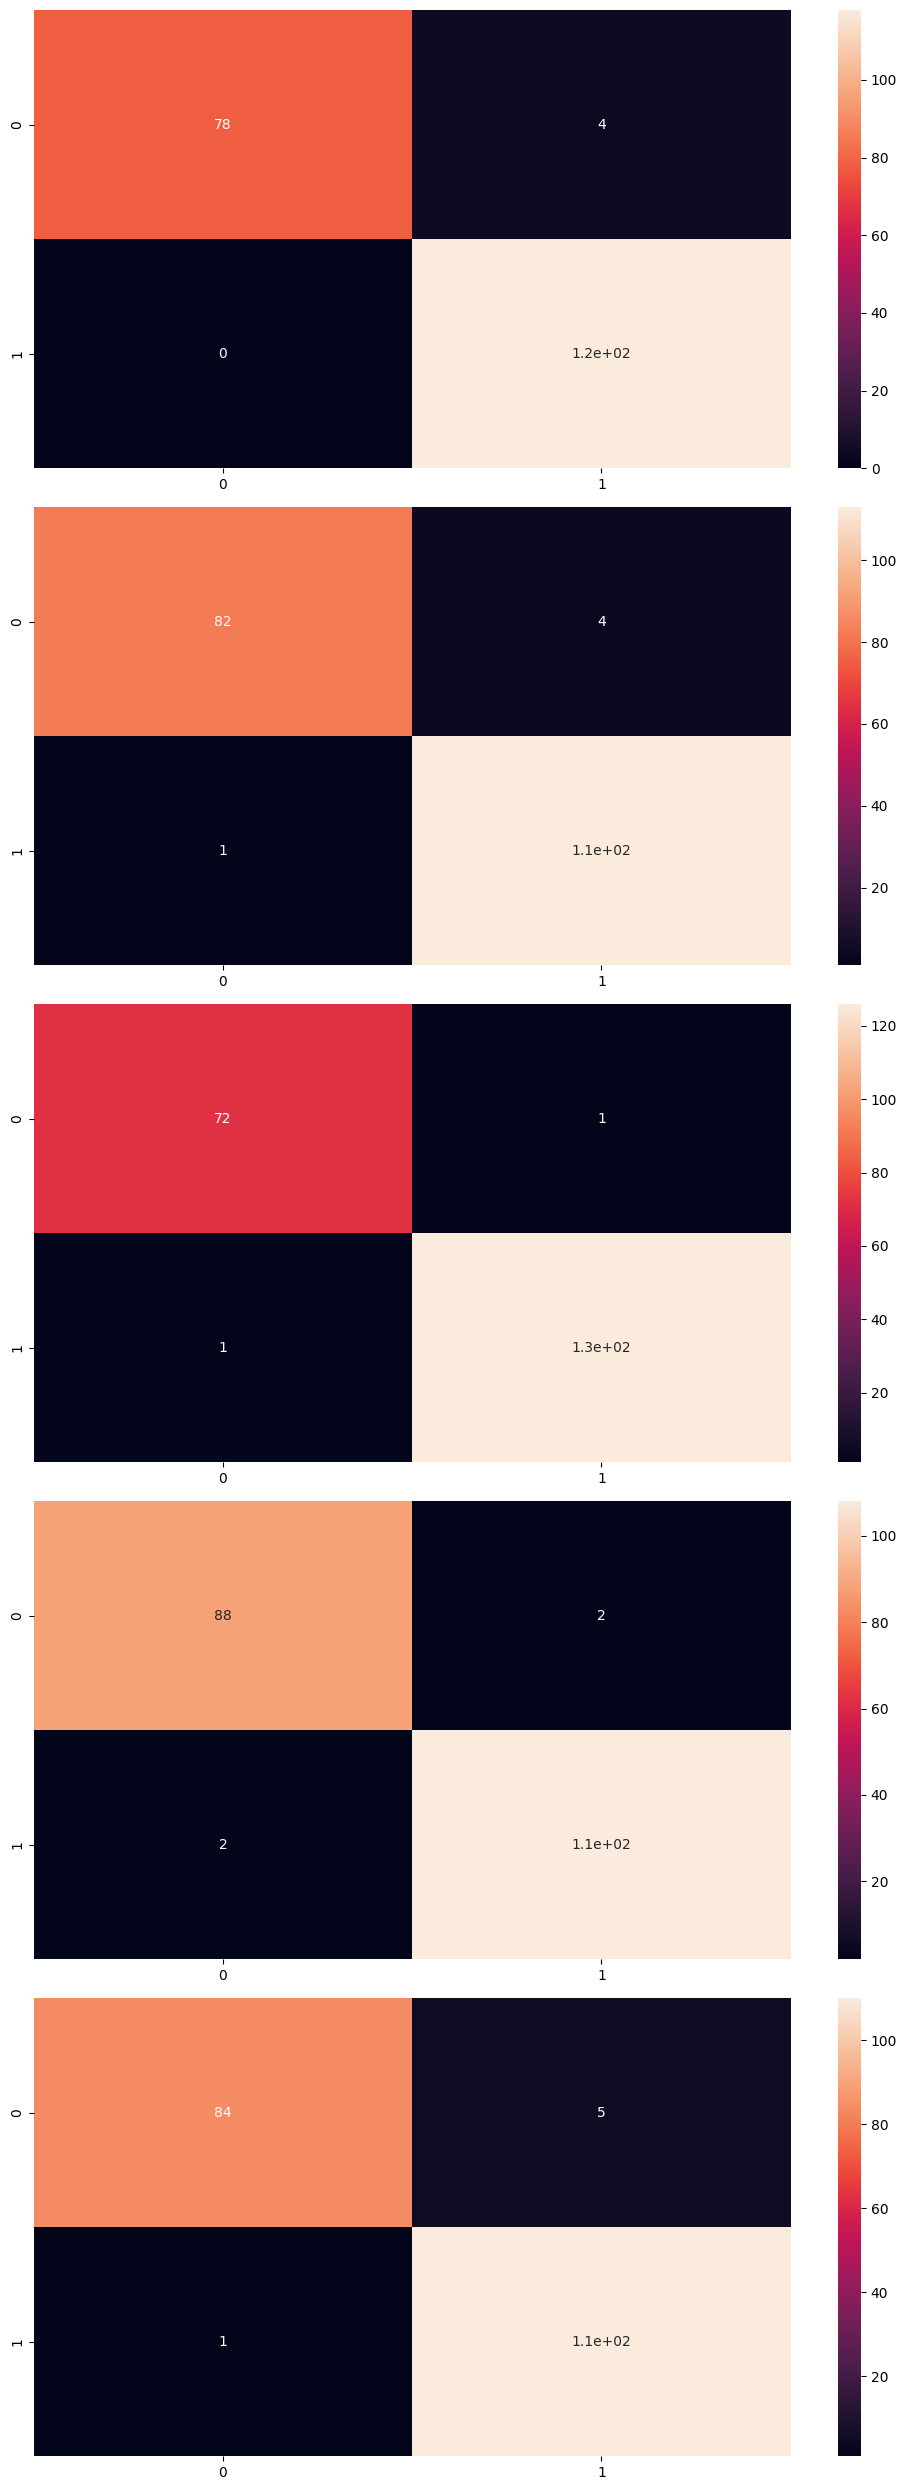

In [ ]:
import lightgbm as lgb

lgb_c = lgb.LGBMClassifier(force_row_wise=True)

import matplotlib.pyplot as plt
fold = 5
train_X = []
test_X = []
train_y = []
test_y = []
seg_len = int(len(X) / fold)

# Create a figure and set the size according to the number of folds
fig, axs = plt.subplots(fold, figsize=(10, 5 * fold))

for fold_num in range(fold):
    st_test = fold_num * seg_len
    en_test = st_test + seg_len
    test_X = X[st_test:en_test]
    train_X = np.concatenate((X[:st_test], X[en_test:]), axis=0)
    test_y = y[st_test:en_test]
    train_y = np.concatenate((y[:st_test], y[en_test:]), axis=0)

    # Use a specific axis for each fold's heatmap
    ax = axs[fold_num]

    print(f"************** FOR fold No. {fold_num} ****************")
    lgb_c.fit(train_X, train_y)
    y_pred = lgb_c.predict(test_X)
    print(classification_report(test_y, y_pred))
    print("Accuracy score of lgb_c", " ", accuracy_score(test_y, y_pred))
    conf = confusion_matrix(test_y, y_pred)
    sns.heatmap(conf, cbar=True, annot=True, ax=ax)  # Use ax parameter to specify the subplot

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

************** FOR fold No. 0 ****************
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96        82
         1.0       0.97      0.97      0.97       118

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

Accuracy score of svc_c   0.965


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 1 ****************
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95        86
         1.0       0.95      0.97      0.96       114

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200

Accuracy score of svc_c   0.955
************** FOR fold No. 2 ****************


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        73
         1.0       0.99      0.98      0.98       127

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

Accuracy score of svc_c   0.98
************** FOR fold No. 3 ****************
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95        90
         1.0       0.95      0.97      0.96       110

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200

Accuracy score of svc_c   0.955


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 4 ****************
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        89
         1.0       0.97      0.95      0.96       111

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

Accuracy score of svc_c   0.96


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



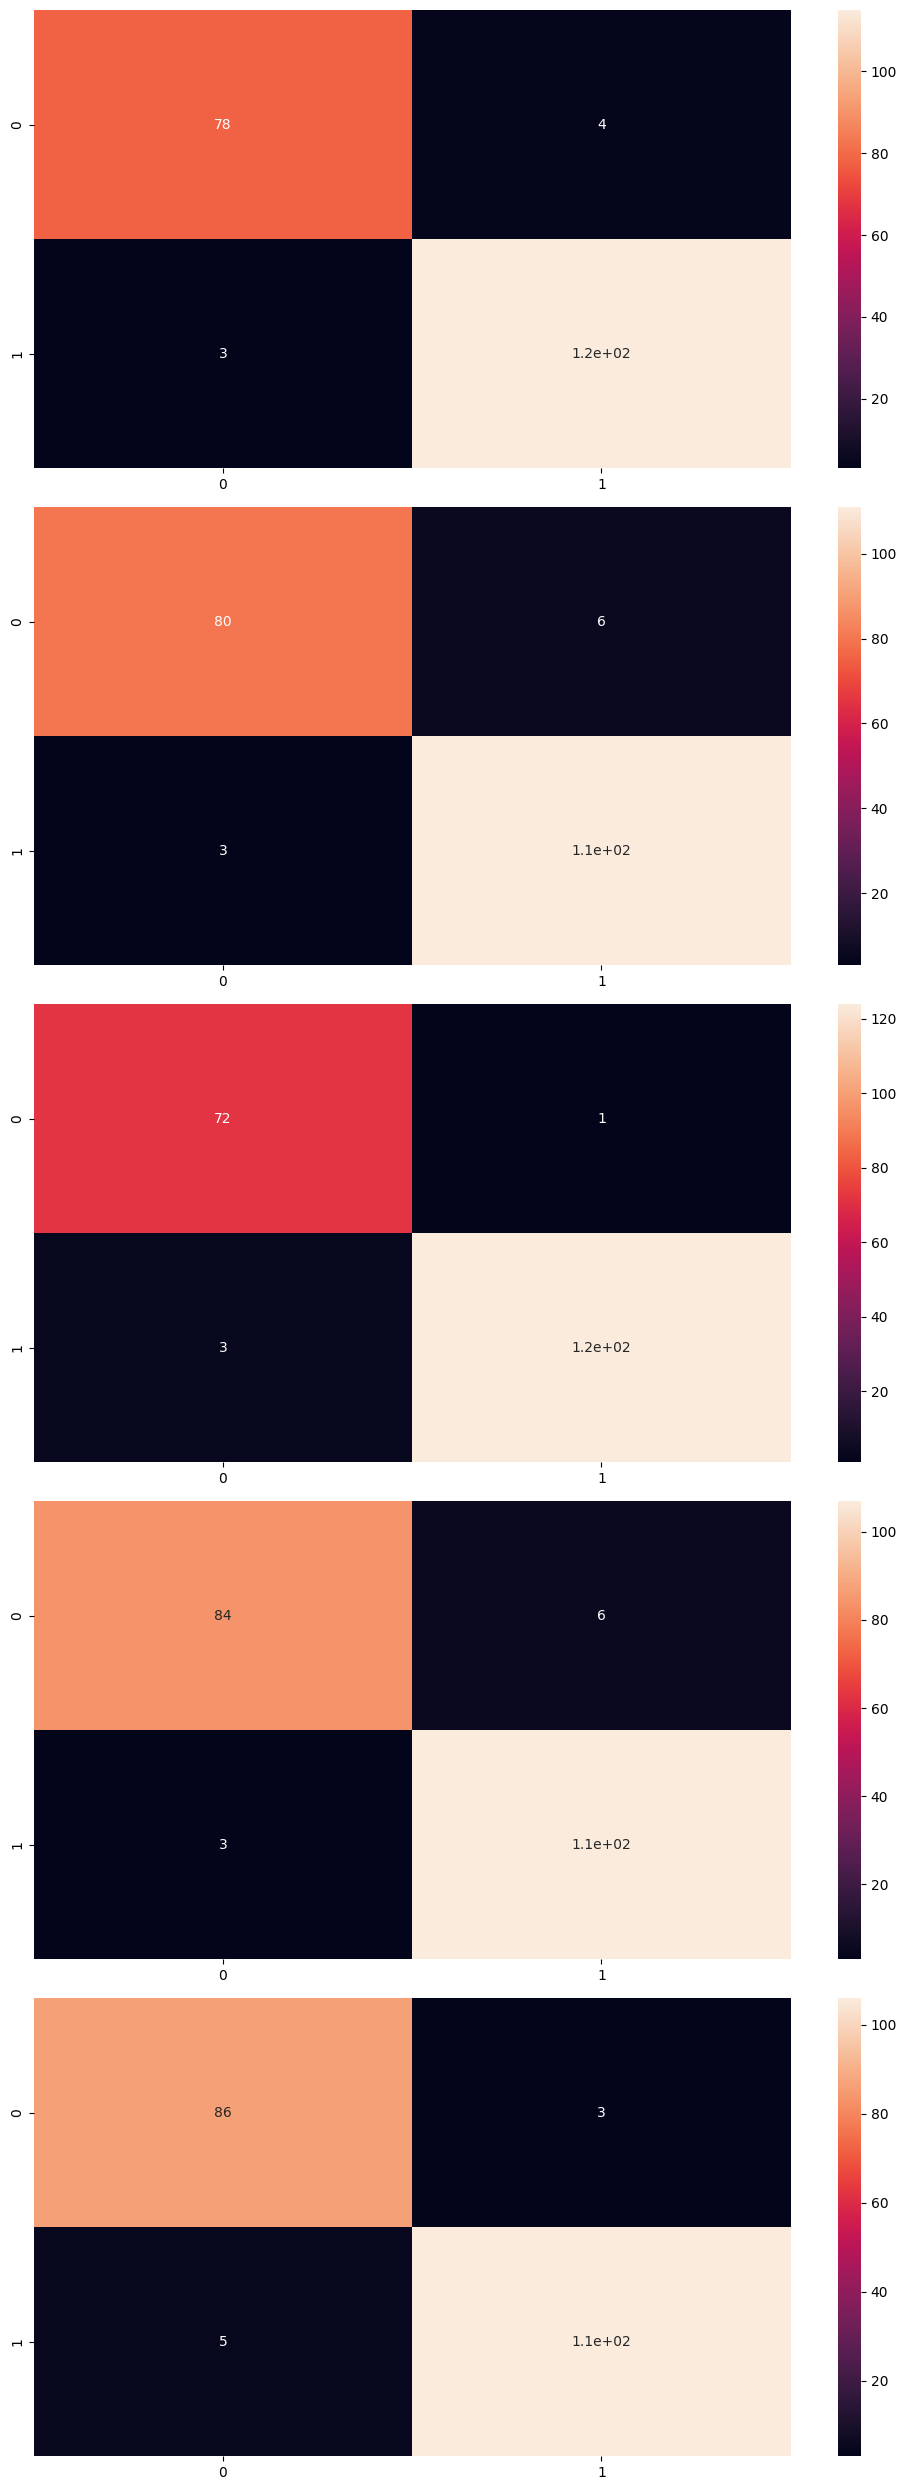

In [ ]:
from sklearn.svm import SVC

svc_c=SVC(random_state=22)

import matplotlib.pyplot as plt
fold = 5
train_X = []
test_X = []
train_y = []
test_y = []
seg_len = int(len(X) / fold)

# Create a figure and set the size according to the number of folds
fig, axs = plt.subplots(fold, figsize=(10, 5 * fold))

for fold_num in range(fold):
    st_test = fold_num * seg_len
    en_test = st_test + seg_len
    test_X = X[st_test:en_test]
    train_X = np.concatenate((X[:st_test], X[en_test:]), axis=0)
    test_y = y[st_test:en_test]
    train_y = np.concatenate((y[:st_test], y[en_test:]), axis=0)

    # Use a specific axis for each fold's heatmap
    ax = axs[fold_num]

    print(f"************** FOR fold No. {fold_num} ****************")
    svc_c.fit(train_X, train_y)
    y_pred = svc_c.predict(test_X)
    print(classification_report(test_y, y_pred))
    print("Accuracy score of svc_c", " ", accuracy_score(test_y, y_pred))
    conf = confusion_matrix(test_y, y_pred)
    sns.heatmap(conf, cbar=True, annot=True, ax=ax)  # Use ax parameter to specify the subplot

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

************** FOR fold No. 0 ****************
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96        82
         1.0       0.96      0.98      0.97       118

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200

Accuracy score of log_r   0.965


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 1 ****************
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92        86
         1.0       0.93      0.96      0.94       114

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200

Accuracy score of log_r   0.935
************** FOR fold No. 2 ****************
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95        73
         1.0       0.98      0.96      0.97       127

    accuracy                           0.96       200
   macro avg       0.95      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

Accuracy score of log_r   0.96


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 3 ****************
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96        90
         1.0       0.97      0.96      0.97       110

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200

Accuracy score of log_r   0.965


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 4 ****************
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96        89
         1.0       0.98      0.95      0.96       111

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

Accuracy score of log_r   0.96


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



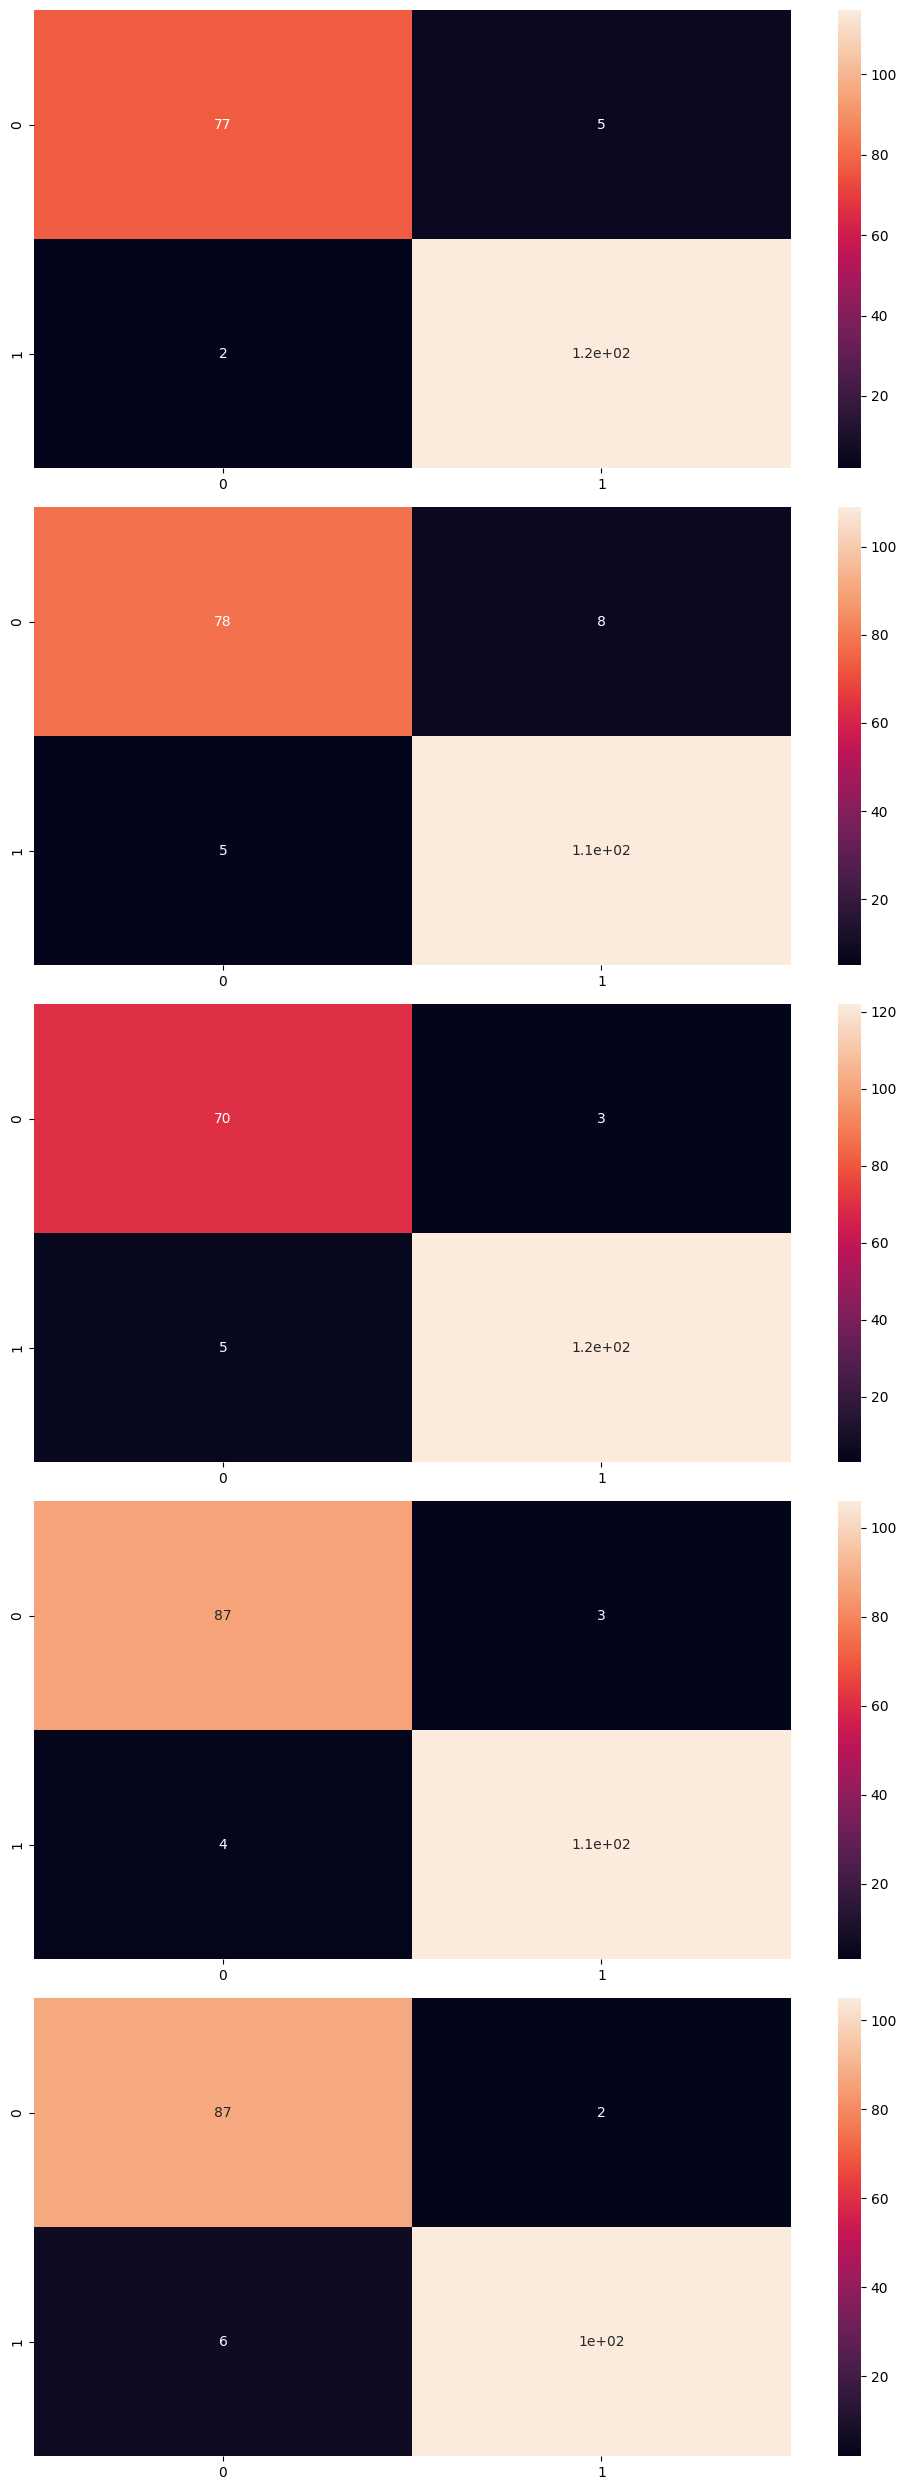

In [ ]:
from sklearn.linear_model import LogisticRegression

log_r = LogisticRegression(max_iter=10000,random_state=22)

import matplotlib.pyplot as plt
fold = 5
train_X = []
test_X = []
train_y = []
test_y = []
seg_len = int(len(X) / fold)

# Create a figure and set the size according to the number of folds
fig, axs = plt.subplots(fold, figsize=(10, 5 * fold))

for fold_num in range(fold):
    st_test = fold_num * seg_len
    en_test = st_test + seg_len
    test_X = X[st_test:en_test]
    train_X = np.concatenate((X[:st_test], X[en_test:]), axis=0)
    test_y = y[st_test:en_test]
    train_y = np.concatenate((y[:st_test], y[en_test:]), axis=0)

    # Use a specific axis for each fold's heatmap
    ax = axs[fold_num]

    print(f"************** FOR fold No. {fold_num} ****************")
    log_r.fit(train_X, train_y)
    y_pred = log_r.predict(test_X)
    print(classification_report(test_y, y_pred))
    print("Accuracy score of log_r", " ", accuracy_score(test_y, y_pred))
    conf = confusion_matrix(test_y, y_pred)
    sns.heatmap(conf, cbar=True, annot=True, ax=ax)  # Use ax parameter to specify the subplot

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

************** FOR fold No. 0 ****************
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93        82
         1.0       0.95      0.96      0.95       118

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Accuracy score of KNN_Model   0.945


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



************** FOR fold No. 1 ****************
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        86
         1.0       0.91      0.91      0.91       114

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

Accuracy score of KNN_Model   0.9


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



************** FOR fold No. 2 ****************
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94        73
         1.0       0.96      0.97      0.96       127

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

Accuracy score of KNN_Model   0.955
************** FOR fold No. 3 ****************


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93        90
         1.0       0.92      0.97      0.95       110

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Accuracy score of KNN_Model   0.94
************** FOR fold No. 4 ****************
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92        89
         1.0       0.93      0.94      0.93       111

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.93      0.92       200

Accuracy score of KNN_Model   0.925


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



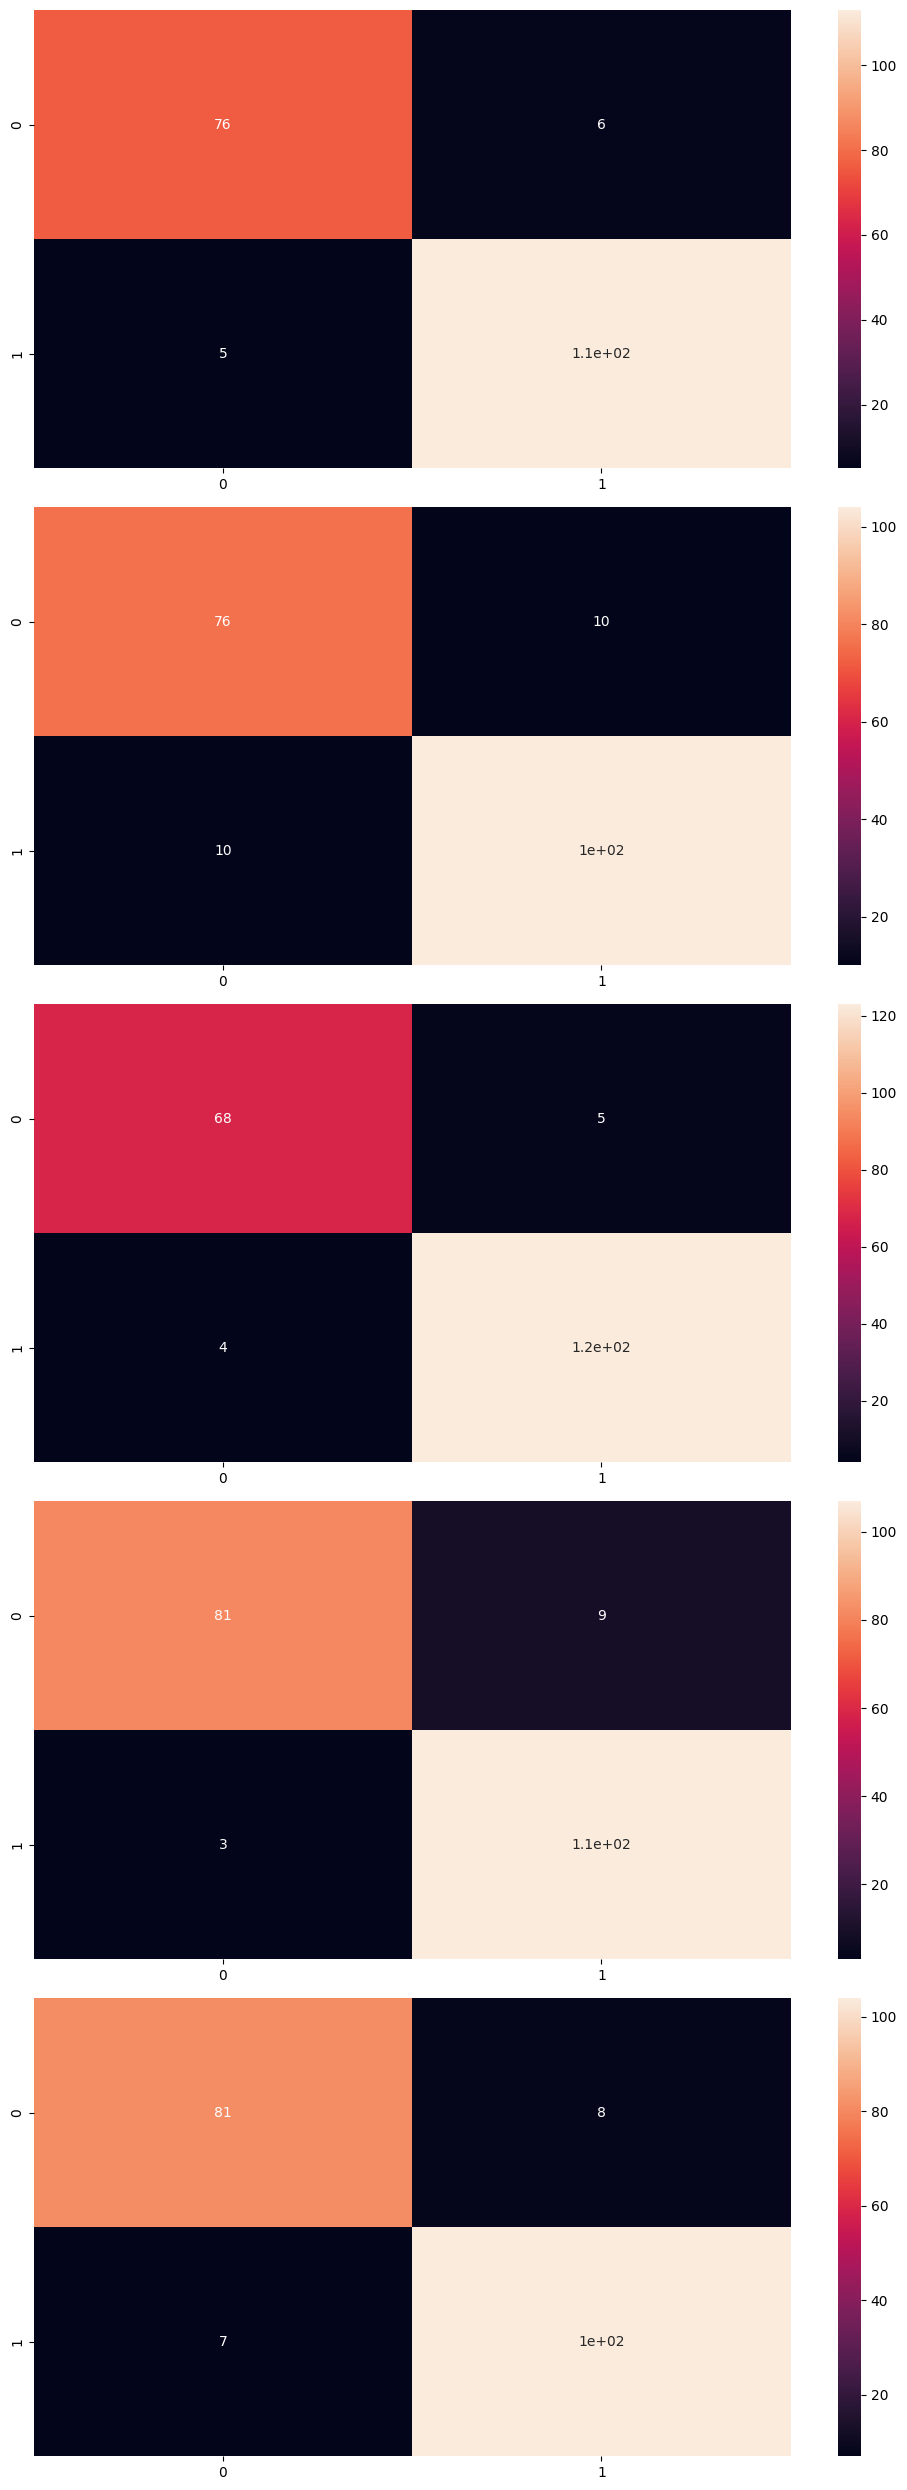

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_Model = KNeighborsClassifier()

import matplotlib.pyplot as plt
fold = 5
train_X = []
test_X = []
train_y = []
test_y = []
seg_len = int(len(X) / fold)

# Create a figure and set the size according to the number of folds
fig, axs = plt.subplots(fold, figsize=(10, 5 * fold))

for fold_num in range(fold):
    st_test = fold_num * seg_len
    en_test = st_test + seg_len
    test_X = X[st_test:en_test]
    train_X = np.concatenate((X[:st_test], X[en_test:]), axis=0)
    test_y = y[st_test:en_test]
    train_y = np.concatenate((y[:st_test], y[en_test:]), axis=0)

    # Use a specific axis for each fold's heatmap
    ax = axs[fold_num]

    print(f"************** FOR fold No. {fold_num} ****************")
    KNN_Model.fit(train_X, train_y)
    y_pred = KNN_Model.predict(test_X)
    print(classification_report(test_y, y_pred))
    print("Accuracy score of KNN_Model", " ", accuracy_score(test_y, y_pred))
    conf = confusion_matrix(test_y, y_pred)
    sns.heatmap(conf, cbar=True, annot=True, ax=ax)  # Use ax parameter to specify the subplot

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

************** FOR fold No. 0 ****************
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96        82
         1.0       0.95      0.99      0.97       118

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200

Accuracy score of GNB_Model   0.965


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 1 ****************
              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92        86
         1.0       0.92      0.96      0.94       114

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

Accuracy score of GNB_Model   0.93
************** FOR fold No. 2 ****************
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        73
         1.0       0.97      0.97      0.97       127

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

Accuracy score of GNB_Model   0.96


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



************** FOR fold No. 3 ****************
              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92        90
         1.0       0.92      0.95      0.94       110

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

Accuracy score of GNB_Model   0.93
************** FOR fold No. 4 ****************
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93        89
         1.0       0.96      0.93      0.94       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Accuracy score of GNB_Model   0.94


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



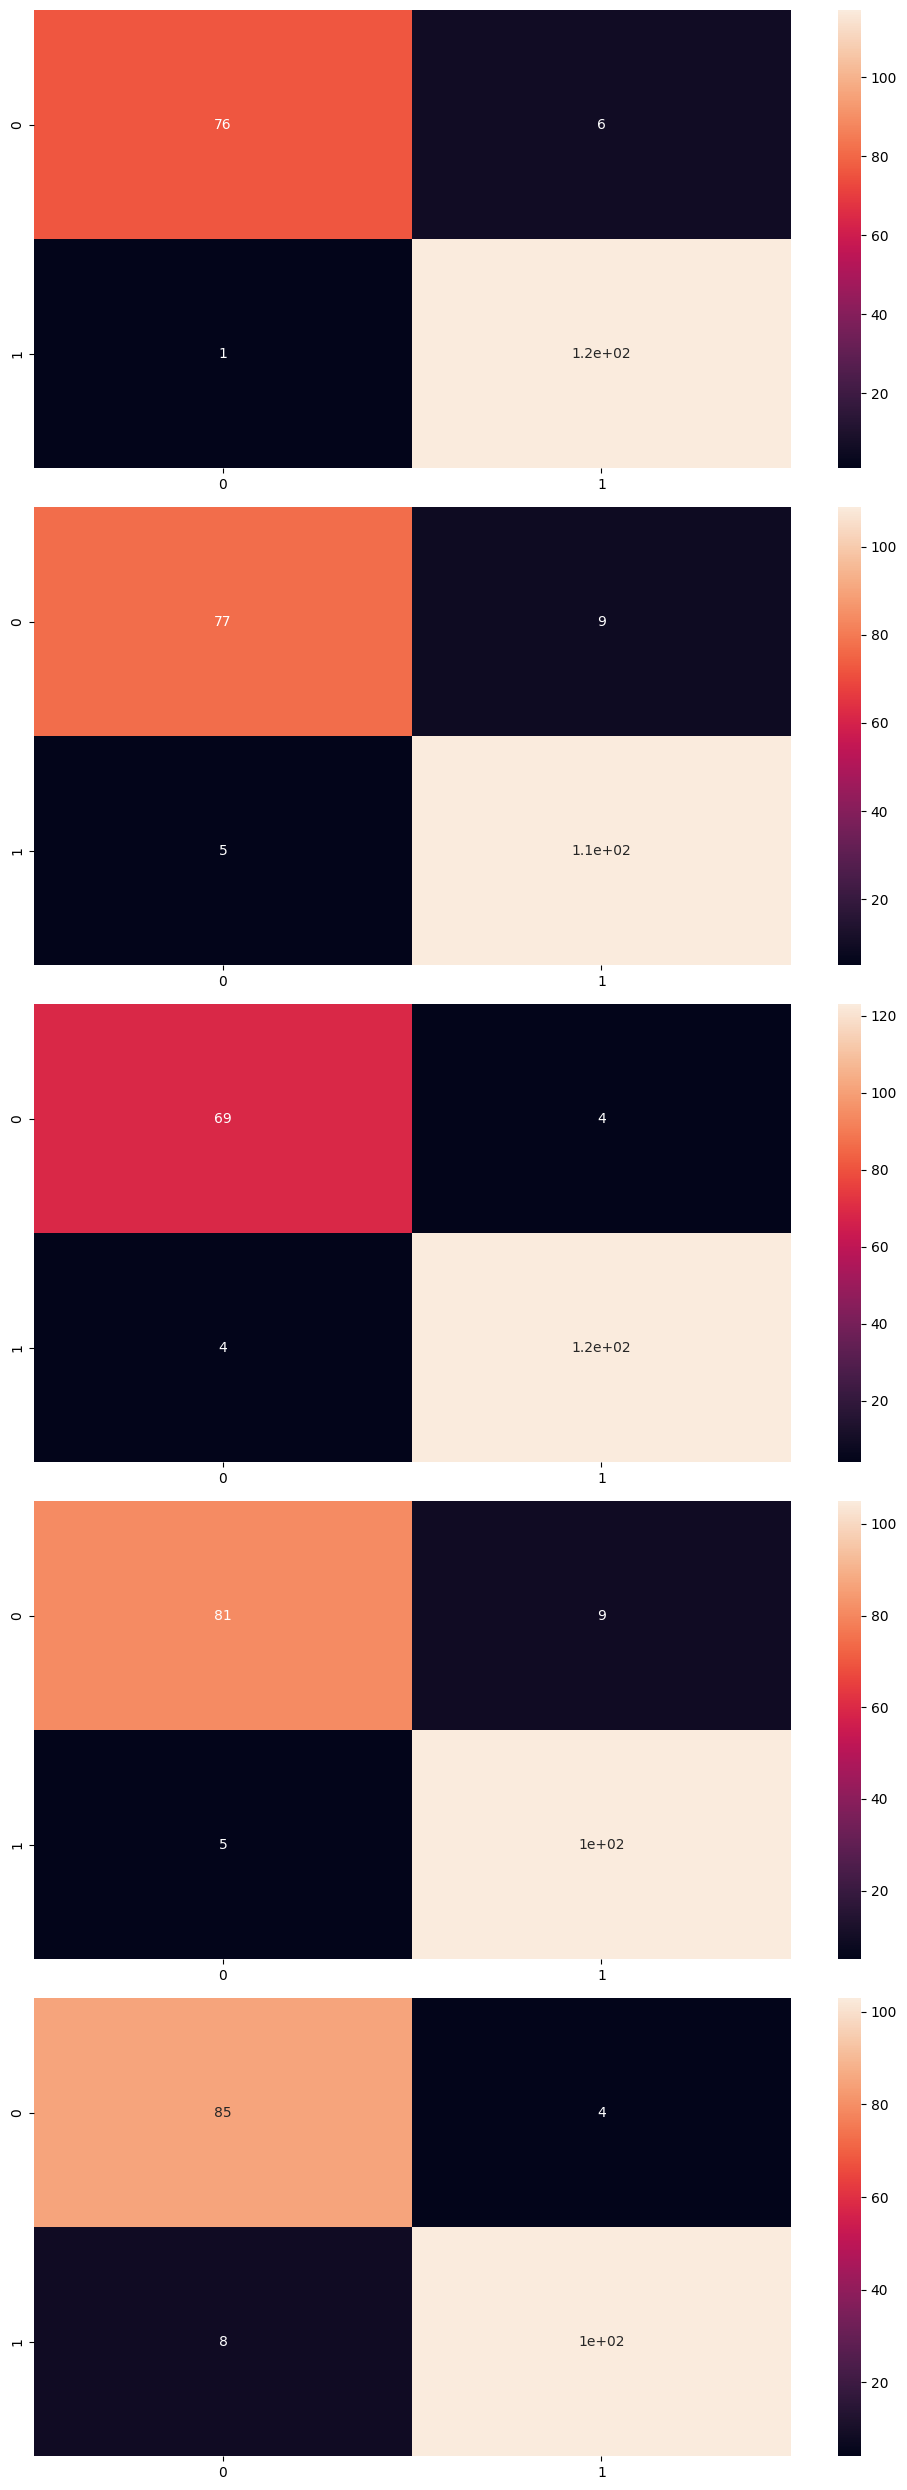

In [ ]:
from sklearn.naive_bayes import GaussianNB

GNB_Model = GaussianNB()

import matplotlib.pyplot as plt
fold = 5
train_X = []
test_X = []
train_y = []
test_y = []
seg_len = int(len(X) / fold)

# Create a figure and set the size according to the number of folds
fig, axs = plt.subplots(fold, figsize=(10, 5 * fold))

for fold_num in range(fold):
    st_test = fold_num * seg_len
    en_test = st_test + seg_len
    test_X = X[st_test:en_test]
    train_X = np.concatenate((X[:st_test], X[en_test:]), axis=0)
    test_y = y[st_test:en_test]
    train_y = np.concatenate((y[:st_test], y[en_test:]), axis=0)

    # Use a specific axis for each fold's heatmap
    ax = axs[fold_num]

    print(f"************** FOR fold No. {fold_num} ****************")
    GNB_Model.fit(train_X, train_y)
    y_pred = GNB_Model.predict(test_X)
    print(classification_report(test_y, y_pred))
    print("Accuracy score of GNB_Model", " ", accuracy_score(test_y, y_pred))
    conf = confusion_matrix(test_y, y_pred)
    sns.heatmap(conf, cbar=True, annot=True, ax=ax)  # Use ax parameter to specify the subplot

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(xgb, open('xgb.pkl', 'wb'))
pickle.dump(dec, open('dec.pkl', 'wb'))
pickle.dump(rfc, open('rfc.pkl', 'wb'))
pickle.dump(model, open('NN.pkl', 'wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))
pickle.dump(lgb_c, open('lgb_c.pkl', 'wb'))
pickle.dump(svc_c, open('svc_c.pkl', 'wb'))
pickle.dump(log_r, open('log_r.pkl', 'wb'))
pickle.dump(KNN_Model, open('KNN.pkl', 'wb'))
pickle.dump(GNB_Model, open('GNB.pkl', 'wb'))